In [ ]:
!git clone
'''ben gimme that repo'''

fatal: You must specify a repository to clone.

usage: git clone [<options>] [--] <repo> [<dir>]

    -v, --verbose         be more verbose
    -q, --quiet           be more quiet
    --progress            force progress reporting
    --reject-shallow      don't clone shallow repository
    -n, --no-checkout     don't create a checkout
    --bare                create a bare repository
    --mirror              create a mirror repository (implies bare)
    -l, --local           to clone from a local repository
    --no-hardlinks        don't use local hardlinks, always copy
    -s, --shared          setup as shared repository
    --recurse-submodules[=<pathspec>]
                          initialize submodules in the clone
    --recursive ...       alias of --recurse-submodules
    -j, --jobs <n>        number of submodules cloned in parallel
    --template <template-directory>
                          directory from which templates will be used
    --reference <repo>    reference rep

'ben gimme that repo'

In [ ]:
!pip install transformers; pip install wayback; pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.1/41.1 kB 539.9 kB/s eta 0:00:00


In [ ]:
import yfinance as yf
from wayback import WaybackClient
import gdown
import torch
import numpy as np
import transformers
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences

from transformers import BertTokenizer
from transformers import get_linear_schedule_with_warmup
from transformers import BertForSequenceClassification, AdamW, BertConfig
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

%matplotlib inline

from bs4 import BeautifulSoup
from urllib.request import urlopen
from urllib.request import Request

# gdown.download('https://drive.google.com/uc?id=1q4U2gVY9tWEPdT6W-pdQpKmo152QqWLE', 'finance_train.csv', True)
# gdown.download('https://drive.google.com/uc?id=1nIBqAsItwVEGVayYTgvybz7HeK0asom0', 'finance_test.csv', True)

!wget 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20NLP%2BFinance/finance_test.csv'
!wget 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20NLP%2BFinance/finance_train.csv'

n = 20 #the # of article headlines displayed per ticker
tickers = ['AAPL', 'TSLA', 'AMZN']

def get_finance_train():
  df_train = pd.read_csv("finance_train.csv")
  return df_train
def get_finance_test():
  df_test = pd.read_csv("finance_test.csv")
  return df_test


def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

print ("Train and Test Files Loaded as train.csv and test.csv")

LABEL_MAP = {0 : "negative", 1 : "neutral", 2 : "positive"}
NONE = 4 * [None]
RND_SEED=2020

--2024-05-03 20:05:22--  https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20NLP%2BFinance/finance_test.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.207, 142.251.2.207, 142.250.101.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29264 (29K) [application/vnd.ms-excel]
Saving to: ‘finance_test.csv’

finance_test.csv    100%[===================>]  28.58K  --.-KB/s    in 0s      

2024-05-03 20:05:22 (96.5 MB/s) - ‘finance_test.csv’ saved [29264/29264]

--2024-05-03 20:05:22--  https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20NLP%2BFinance/finance_train.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.207, 142.251.2.207, 142.250.101.207, ...
Connecting to storage.googleapis

In [ ]:
msft = yf.Ticker("MSFT")

In [ ]:
hist = msft.history(period="1mo")

In [ ]:
msft.history_metadata

{'currency': 'USD',
 'symbol': 'MSFT',
 'exchangeName': 'NMS',
 'fullExchangeName': 'NasdaqGS',
 'instrumentType': 'EQUITY',
 'firstTradeDate': 511108200,
 'regularMarketTime': 1714064599,
 'hasPrePostMarketData': True,
 'gmtoffset': -14400,
 'timezone': 'EDT',
 'exchangeTimezoneName': 'America/New_York',
 'regularMarketPrice': 395.68,
 'fiftyTwoWeekHigh': 395.74,
 'fiftyTwoWeekLow': 388.035,
 'regularMarketDayHigh': 395.74,
 'regularMarketDayLow': 388.035,
 'regularMarketVolume': 20890844,
 'chartPreviousClose': 422.86,
 'priceHint': 2,
 'currentTradingPeriod': {'pre': {'timezone': 'EDT',
   'start': 1714032000,
   'end': 1714051800,
   'gmtoffset': -14400},
  'regular': {'timezone': 'EDT',
   'start': 1714051800,
   'end': 1714075200,
   'gmtoffset': -14400},
  'post': {'timezone': 'EDT',
   'start': 1714075200,
   'end': 1714089600,
   'gmtoffset': -14400}},
 'dataGranularity': '1d',
 'range': '1mo',
 'validRanges': ['1d',
  '5d',
  '1mo',
  '3mo',
  '6mo',
  '1y',
  '2y',
  '5y',
 

In [ ]:
print(hist)

                                 Open        High         Low       Close  \
Date                                                                        
2024-03-25 00:00:00-04:00  425.239990  427.410004  421.609985  422.859985   
2024-03-26 00:00:00-04:00  425.609985  425.989990  421.350006  421.649994   
2024-03-27 00:00:00-04:00  424.440002  424.450012  419.010010  421.429993   
2024-03-28 00:00:00-04:00  420.959991  421.869995  419.119995  420.720001   
2024-04-01 00:00:00-04:00  423.950012  427.890015  422.220001  424.570007   
2024-04-02 00:00:00-04:00  420.109985  422.380005  417.839996  421.440002   
2024-04-03 00:00:00-04:00  419.730011  423.260010  419.089996  420.450012   
2024-04-04 00:00:00-04:00  424.989990  428.670013  417.570007  417.880005   
2024-04-05 00:00:00-04:00  420.010010  426.510010  418.320007  425.519989   
2024-04-08 00:00:00-04:00  425.170013  427.279999  423.299988  424.589996   
2024-04-09 00:00:00-04:00  426.440002  427.739990  421.619995  426.279999   

## Webscrape

In [ ]:
finviz_url = 'https://finviz.com/quote.ashx?t='
news_tables = {}

for ticker in tickers:
    url = finviz_url + ticker
    req = Request(url=url,headers={'user-agent': 'FireFox'})
    resp = urlopen(req)
    html = BeautifulSoup(resp, features="lxml")
    news_table = html.find(id='news-table')
    news_tables[ticker] = news_table

try:
    for ticker in tickers:
        df = news_tables[ticker]
        df_tr = df.findAll('tr')


        for i, table_row in enumerate(df_tr):
            # print("table row", table_row)
            try:
              a_text = table_row.a.text
            except:
              continue
            td_text = table_row.td.text
            td_text = td_text.strip()
            if i == n-1:
                break
except KeyError:
    pass

parsed_news = []
for file_name, news_table in news_tables.items():
    for x in news_table.findAll('tr'):
        try:
          text = x.a.get_text()
        except:
          continue
        date_scrape = x.td.text.split()

        if len(date_scrape) == 1:
            time = date_scrape[0]

        else:
            date = date_scrape[0]
            time = date_scrape[1]

        ticker = file_name.split('_')[0]

        parsed_news.append([ticker, date, time, text])

columns = ['Ticker', 'Date', 'Time', 'Headline']
news = pd.DataFrame(parsed_news, columns=columns)
print(news)

    Ticker       Date     Time  \
0     AAPL      Today  04:29PM   
1     AAPL      Today  04:12PM   
2     AAPL      Today  03:56PM   
3     AAPL      Today  03:51PM   
4     AAPL      Today  03:46PM   
..     ...        ...      ...   
295   AMZN  May-01-24  07:42AM   
296   AMZN  May-01-24  07:35AM   
297   AMZN  May-01-24  07:30AM   
298   AMZN  May-01-24  07:30AM   
299   AMZN  May-01-24  07:25AM   

                                              Headline  
0    Apple: Here's why Morgan Stanley's Erik Woodri...  
1    Stocks jump after April jobs data, Apple buyba...  
2    Apple bulls raise price targets after buyback ...  
3    Hudson Pacific Properties, Inc. (NYSE:HPP) Q1 ...  
4    These Stocks Are Moving the Most Today: Apple,...  
..                                                 ...  
295  Monness Crespi Hardt Raises Amazon's Price Tar...  
296  Seaport Global Securities Adjusts Amazon Price...  
297  Amazon jumps on earnings, Fed decision nears: ...  
298  Amazon Stock Ear

## Tokenize stuff

In [ ]:
# TODO: make class to handle tokenization
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased", do_lower_case = True)

class CustomTokenizer:
  def __init__(self, tokenizer):
    self.tokenizer = tokenizer
    self.do_lower_case = True

  def tokenize(self,sentences):
    # print(df["Sentence"].values)
    # labels = df["Label"].values
    sentences_with_special_tokens = []
    tokenized_texts = []
    input_ids = []
    attention_masks = []


    for sentence in sentences:
      sentence = "[CLS] " + sentence + " [SEP]" # add beginning & ending tokens
      sentences_with_special_tokens.append(sentence)

    for sentence in sentences_with_special_tokens:
      sentence = self.tokenizer.tokenize(sentence)
      tokenized_texts.append(sentence)

    for sentence in tokenized_texts:
      sentence = self.tokenizer.convert_tokens_to_ids(sentence)
      input_ids.append(sentence)

    input_ids = pad_sequences(input_ids,
                          maxlen=128,
                          dtype="long",
                          truncating="post",
                          padding="post")

    for sentence in input_ids:
      sentence = [float(i>0) for i in sentence]
      attention_masks.append(sentence)

    return input_ids, attention_masks



"""
outputs = model(b_input_ids,
                                   token_type_ids=None,
                                   attention_mask=b_input_mask,
                                   labels=b_labels)
# self.df = get_finance_train()
# df_test = get_finance_test()
"""

'\noutputs = model(b_input_ids,\n                                   token_type_ids=None,\n                                   attention_mask=b_input_mask,\n                                   labels=b_labels)\n# self.df = get_finance_train()\n# df_test = get_finance_test()\n'

In [ ]:
df_train = pd.read_csv('finance_train.csv')
df_test = pd.read_csv('finance_test.csv')

custom_tokenizer = CustomTokenizer(BertTokenizer.from_pretrained("bert-base-uncased", do_lower_case = True))
input_ids, attention_masks = custom_tokenizer.tokenize(df_train['Sentence'].values) # TODO: accuracy score by category
labels = df_train['Label'].values

In [ ]:
outputs = model(input_ids,
                                   token_type_ids=None,
                                   attention_mask=attention_masks,
                                   labels=b_labels)
loss = outputs[0]
logits = outputs[1]

## Splits, Model Initialization

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(input_ids, labels, test_size = 0.15, random_state=RND_SEED)
train_masks, validation_masks, _, _ = train_test_split(attention_masks, input_ids, test_size = 0.15, random_state=RND_SEED)
train_inputs = torch.tensor(np.array(X_train));
validation_inputs = torch.tensor(np.array(X_val));
train_masks = torch.tensor(np.array(train_masks));
validation_masks = torch.tensor(np.array(validation_masks));
train_labels = torch.tensor(np.array(y_train));
validation_labels = torch.tensor(np.array(y_val));

batch_size = 32
train_data = TensorDataset(train_inputs, train_masks, train_labels);
train_sampler = RandomSampler(train_data);
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size);
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels);
validation_sampler = SequentialSampler(validation_data);
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size);

# Consider using roberta if base bert isn't good enough
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels = 3,
    output_attentions = False,
    output_hidden_states = False,
);


model.cuda();

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()
torch.cuda.get_device_name(0)
optimizer = AdamW(model.parameters(),
                  lr = 2e-5,
                  eps = 1e-8
                )
epochs = 4

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:521: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


## Train Loop

In [ ]:
from tqdm import tqdm
total_steps = len(train_dataloader) * epochs

scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

training_loss = []
validation_loss = []
training_stats = []

np.random.seed(RND_SEED)
torch.manual_seed(RND_SEED)
torch.cuda.manual_seed_all(RND_SEED)

for epoch_i in range(0, epochs):
    print('Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training the model')
    total_train_loss = 0
    model.train()
    for step, batch in tqdm(enumerate(train_dataloader)):
        if step % 20 == 0 and not step == 0:
            print('  Batch {:>5,}  of  {:>5,}. '.format(step, len(train_dataloader)))

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        model.zero_grad()

        outputs = model(b_input_ids,
                             token_type_ids=None,
                             attention_mask=b_input_mask,
                             labels=b_labels)
        loss = outputs[0]
        logits = outputs[1]

        total_train_loss += loss.item()

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()

    avg_train_loss = total_train_loss / len(train_dataloader)

    print("  Average training loss: {0:.2f}".format(avg_train_loss))


    print("Evaluating on Validation Set")
    model.eval()
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0
    for batch in validation_dataloader:

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        with torch.no_grad():

            outputs = model(b_input_ids,
                                   token_type_ids=None,
                                   attention_mask=b_input_mask,
                                   labels=b_labels)
            loss = outputs[0]
            logits = outputs[1]

        total_eval_loss += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()


        total_eval_accuracy += flat_accuracy(logits, label_ids)


    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("Validation Accuracy: {0:.2f}".format(avg_val_accuracy))

    avg_val_loss = total_eval_loss / len(validation_dataloader)

    print("Validation Loss: {0:.2f}".format(avg_val_loss))


    training_loss.append(avg_train_loss)
    validation_loss.append(avg_val_loss)

    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy

        }
    )

print("Training complete!")

Epoch 1 / 4 ========
Training the model


20it [00:13,  1.68it/s]

  Batch    20  of     55. 


40it [00:26,  1.63it/s]

  Batch    40  of     55. 


55it [00:34,  1.57it/s]


  Average training loss: 0.63
Evaluating on Validation Set
Validation Accuracy: 0.80
Validation Loss: 0.43
Epoch 2 / 4 ========
Training the model


20it [00:12,  1.55it/s]

  Batch    20  of     55. 


40it [00:26,  1.49it/s]

  Batch    40  of     55. 


55it [00:35,  1.54it/s]


  Average training loss: 0.35
Evaluating on Validation Set
Validation Accuracy: 0.83
Validation Loss: 0.32
Epoch 3 / 4 ========
Training the model


20it [00:13,  1.50it/s]

  Batch    20  of     55. 


40it [00:26,  1.53it/s]

  Batch    40  of     55. 


55it [00:35,  1.53it/s]


  Average training loss: 0.20
Evaluating on Validation Set
Validation Accuracy: 0.95
Validation Loss: 0.17
Epoch 4 / 4 ========
Training the model


20it [00:12,  1.54it/s]

  Batch    20  of     55. 


40it [00:25,  1.53it/s]

  Batch    40  of     55. 


55it [00:35,  1.56it/s]


  Average training loss: 0.10
Evaluating on Validation Set
Validation Accuracy: 0.95
Validation Loss: 0.16
Training complete!


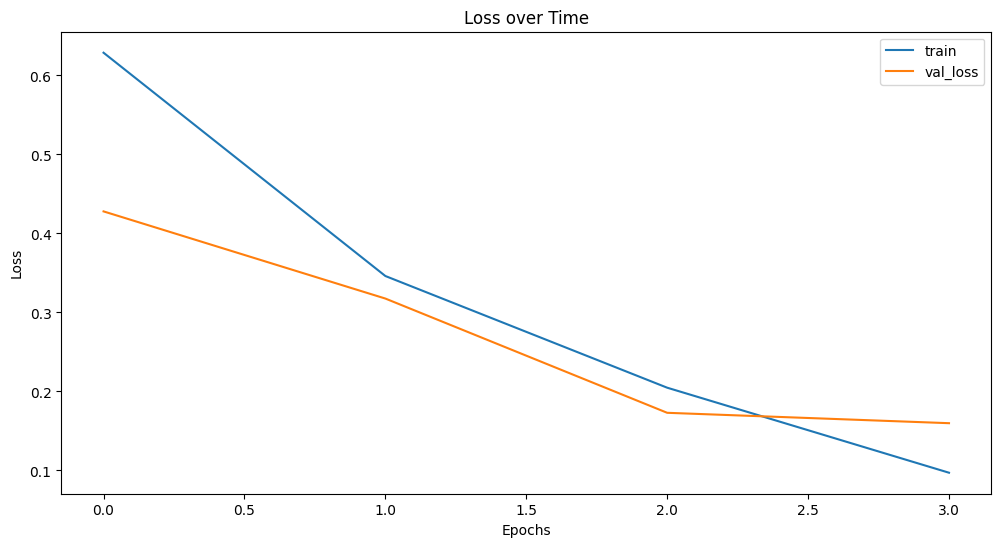

In [ ]:
fig = plt.figure(figsize=(12,6))
plt.title('Loss over Time')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.plot(training_loss, label = "train")
plt.plot(validation_loss, label = "val_loss")

plt.legend()
plt.show()
test_sentences = df_test["Sentence"].values
test_labels = df_test["Label"].values

In [ ]:
test_input_ids, test_attention_masks = [], []

test_sentences = ["[CLS] " + sentence + " [SEP]" for sentence in test_sentences]

tokenized_test_sentences = [tokenizer.tokenize(sent) for sent in test_sentences]

test_input_ids = [tokenizer.convert_tokens_to_ids(txt) for txt in tokenized_test_sentences]

test_input_ids = pad_sequences(test_input_ids,
                               maxlen=128,
                               dtype="long",
                               truncating="post",
                               padding="post")

for sequence in test_input_ids:
  mask = [float(i>0) for i in sequence]
  test_attention_masks.append(mask)

In [ ]:
batch_size = 32
test_input_ids = torch.tensor(test_input_ids)
test_attention_masks = torch.tensor(test_attention_masks)
test_labels = torch.tensor(test_labels)
prediction_data = TensorDataset(test_input_ids, test_attention_masks, test_labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

<ipython-input-84-c7ec7857efdc>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_labels = torch.tensor(test_labels)


In [ ]:

print('Predicting labels for {:,} test sentences...'.format(len(test_input_ids)))

model.eval()

predictions , true_labels = [], []

for batch in prediction_dataloader:
  batch = tuple(t.to(device) for t in batch)
  b_input_ids, b_input_mask, b_labels = batch

  with torch.no_grad():
      outputs = model(b_input_ids, token_type_ids=None,
                      attention_mask=b_input_mask)

  logits = outputs[0]

  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()

  predictions.append(torch.softmax(torch.from_numpy(logits), dim=1))
  true_labels.append(label_ids)


from sklearn.metrics import accuracy_score
# flat_predictions = [item for sublist in predictions for item in sublist]
# flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

# print(" sigmoided accuracy {:.2%}".format(accuracy_score(label_ids, , *, normalize=True, sample_weight=None)))


Predicting labels for 227 test sentences...


In [ ]:
print(len(test_sentences))
print(len(test_labels))
print(len(predictions))

227
227
8


In [ ]:
idx = 0
for batch_prediction in predictions:
  for prediction in batch_prediction:
    print(prediction)
    t = LABEL_MAP[torch.argmax(prediction).item()]
    print(prediction, "main prediction",t, "label for sentence", LABEL_MAP[test_labels[idx].item()], " predicted for sentence: ", test_sentences[idx])
    idx += 1

tensor([0.0637, 0.0182, 0.9181])
tensor([0.0637, 0.0182, 0.9181]) main prediction positive label for sentence positive  predicted for sentence:  [CLS] [CLS] [CLS] In the third quarter of 2010 , net sales increased by 5.2 % to EUR 205.5 mn , and operating profit by 34.9 % to EUR 23.5 mn . [SEP] [SEP] [SEP]
tensor([0.0681, 0.0179, 0.9140])
tensor([0.0681, 0.0179, 0.9140]) main prediction positive label for sentence positive  predicted for sentence:  [CLS] [CLS] [CLS] Foundries division reports its sales increased by 9.7 % to EUR 63.1 mn from EUR 57.5 mn in the corresponding period in 2006 , and sales of the Machine Shop division increased by 16.4 % to EUR 41.2 mn from EUR 35.4 mn in the corresponding period in 2006 . [SEP] [SEP] [SEP]
tensor([0.0034, 0.9887, 0.0079])
tensor([0.0034, 0.9887, 0.0079]) main prediction neutral label for sentence neutral  predicted for sentence:  [CLS] [CLS] [CLS] Financing of the project will come mainly from China . [SEP] [SEP] [SEP]
tensor([0.0069, 0.9836,

In [ ]:
real_input_ids, real_attention_masks = [], []

real_sentences = ["[CLS] " + sentence + " [SEP]" for sentence in news["Headline"]]

tokenized_real_sentences = [tokenizer.tokenize(sent) for sent in real_sentences]

real_input_ids = [tokenizer.convert_tokens_to_ids(txt) for txt in tokenized_real_sentences]

real_input_ids = pad_sequences(real_input_ids,
                               maxlen=128,
                               dtype="long",
                               truncating="post",
                               padding="post")

for sequence in real_input_ids:
  mask = [float(i>0) for i in sequence]
  real_attention_masks.append(mask)

In [ ]:
batch_size = 32
real_input_ids = torch.tensor(real_input_ids)
real_attention_masks = torch.tensor(real_attention_masks)
prediction_data = TensorDataset(real_input_ids, real_attention_masks)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

In [ ]:
predictions = []

for batch in prediction_dataloader:
  batch = tuple(t.to(device) for t in batch)
  b_input_ids, b_input_mask = batch

  with torch.no_grad():
      outputs = model(b_input_ids, token_type_ids=None,
                      attention_mask=b_input_mask)

  logits = outputs[0]

  logits = logits.detach().cpu().numpy()
  # label_ids = b_labels.to('cpu').numpy()

  for logit in logits:
    # print(logit.shape)
    softmaxxed = torch.softmax(torch.from_numpy(logit), dim=0)
    # print(softmaxxed, torch.argmax(softmaxxed, dim=0))
    final_arr = torch.concatenate((softmaxxed, torch.argmax(softmaxxed, dim=0).unsqueeze(0)))
    predictions.append(final_arr)

print("predictions")

df_scores = pd.DataFrame(np.array(predictions))
news_joined = news.join(df_scores.rename(columns={**LABEL_MAP, 3: "Sentiment"}), rsuffix='_right')

# in the Sentiment column, assign each to label map
news_joined['Sentiment'] = news_joined['Sentiment'].map(LABEL_MAP)

predictions


In [ ]:
news_joined

Ticker       Date     Time  \
0     AAPL      Today  04:29PM   
1     AAPL      Today  04:12PM   
2     AAPL      Today  03:56PM   
3     AAPL      Today  03:51PM   
4     AAPL      Today  03:46PM   
..     ...        ...      ...   
295   AMZN  May-01-24  07:42AM   
296   AMZN  May-01-24  07:35AM   
297   AMZN  May-01-24  07:30AM   
298   AMZN  May-01-24  07:30AM   
299   AMZN  May-01-24  07:25AM   

                                              Headline  negative   neutral  \
0    Apple: Here's why Morgan Stanley's Erik Woodri...  0.018430  0.959906   
1    Stocks jump after April jobs data, Apple buyba...  0.054879  0.915280   
2    Apple bulls raise price targets after buyback ...  0.010485  0.942235   
3    Hudson Pacific Properties, Inc. (NYSE:HPP) Q1 ...  0.003686  0.986946   
4    These Stocks Are Moving the Most Today: Apple,...  0.006838  0.971291   
..                                                 ...       ...       ...   
295  Monness Crespi Hardt Raises Amazon's Price Tar...  0.033010  0.047273   
296  Seaport Global Securities Adjusts Amazon Price...  0.004189  0.967357   
297  Amazon jumps on earnings, Fed decision nears: ...  0.006771  0.964300   
298  Amazon Stock Earnings: The Path to $1 Trillion...  0.004480  0.977552   
299  Oppenheimer Adjusts Amazon.com's Price Target ...  0.008218  0.919945   

     positive Sentiment  
0    0.021664   neutral  
1    0.029841   neutral  
2    0.047280   neutral  
3    0.009368   neutral  
4    0.021871   neutral  
..        ...       ...  
295  0.919717  positive  
296  0.028454   neutral  
297  0.028929   neutral  
298  0.017968   neutral  
299  0.071838   neutral  

[300 rows x 8 columns]

In [ ]:
# Using dataframe news_joined: show number of negative, positive, neutral sentiments. print by ticker

news_joined.groupby('Ticker').agg(
    negative_count=('negative', 'sum'),
    positive_count=('positive', 'sum'),
    neutral_count=('neutral', 'sum')
)


negative_count  positive_count  neutral_count
Ticker                                               
AAPL         11.613146       21.856199      66.530655
AMZN          6.705750       19.593880      73.700371
TSLA         10.611959       14.942500      74.445541

In [ ]:
# print number of positive, negatives in news_joined
print(news_joined['negative'].value_counts())
print(news_joined['neutral'].value_counts())
print(news_joined['positive'].value_counts())


negative
0.029937    3
0.007156    2
0.006514    2
0.020717    2
0.007539    2
           ..
0.004932    1
0.003383    1
0.163616    1
0.041505    1
0.009235    1
Name: count, Length: 288, dtype: int64
neutral
0.981643    3
0.187607    3
0.915057    2
0.931849    2
0.979348    2
           ..
0.984201    1
0.988623    1
0.054766    1
0.630656    1
0.951950    1
Name: count, Length: 287, dtype: int64
positive
0.782455    3
0.013497    2
0.012541    2
0.047434    2
0.009520    2
           ..
0.010867    1
0.007994    1
0.781618    1
0.327838    1
0.038815    1
Name: count, Length: 288, dtype: int64


In [ ]:
news['Date'] = pd.to_datetime(news.Date).dt.date

unique_ticker = news['Ticker'].unique().tolist()
news_dict = {name: news.loc[news['Ticker'] == name] for name in unique_ticker}

values = []
for ticker in tickers:
    dataframe = news_dict[ticker]
    dataframe = dataframe.set_index('Ticker')
    dataframe = dataframe.drop(columns = ['Headline'])
    print ('\n')
    print (dataframe.head())

    mean = round(dataframe['compound'].mean(), 2)
    values.append(mean)

df = pd.DataFrame(list(zip(tickers, values)), columns =['Ticker', 'Mean Sentiment'])
df = df.set_index('Ticker')
df = df.sort_values('Mean Sentiment', ascending=False)
print ('\n')
print (df)